In [16]:
suppressMessages(library(tidyverse))
suppressMessages(library(lubridate))
suppressMessages(library(ggplot2))
suppressMessages(library(saqgetr))


suppressMessages(library(repr))
options(repr.plot.width=25,
        repr.plot.height=10,
        #repr.plot.pointsize=50,
        repr.plot.family='serif'
       )

In [17]:
data <- read.csv("../../data/EEA/ES1580A-NO2.csv")

In [18]:
head(data)

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,ES,ES.BDCA.AQD,NET_ES206A,STA_ES1580A,ES1580A,SP_39075006_8_8,SPP_39075006_8_8.1,SAM_39075006_8_8,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollutant/8,hour,9.0000000000,g/m3,2013-10-21 23:00:00 +01:00,2013-10-22 00:00:00 +01:00,1,1
2,ES,ES.BDCA.AQD,NET_ES206A,STA_ES1580A,ES1580A,SP_39075006_8_8,SPP_39075006_8_8.1,SAM_39075006_8_8,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollutant/8,hour,20.0000000000,g/m3,2013-01-16 20:00:00 +01:00,2013-01-16 21:00:00 +01:00,1,1
3,ES,ES.BDCA.AQD,NET_ES206A,STA_ES1580A,ES1580A,SP_39075006_8_8,SPP_39075006_8_8.1,SAM_39075006_8_8,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollutant/8,hour,18.0000000000,g/m3,2013-01-15 09:00:00 +01:00,2013-01-15 10:00:00 +01:00,1,1
4,ES,ES.BDCA.AQD,NET_ES206A,STA_ES1580A,ES1580A,SP_39075006_8_8,SPP_39075006_8_8.1,SAM_39075006_8_8,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollutant/8,hour,18.0000000000,g/m3,2013-01-15 21:00:00 +01:00,2013-01-15 22:00:00 +01:00,1,1
5,ES,ES.BDCA.AQD,NET_ES206A,STA_ES1580A,ES1580A,SP_39075006_8_8,SPP_39075006_8_8.1,SAM_39075006_8_8,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollutant/8,hour,8.0000000000,g/m3,2013-01-16 00:00:00 +01:00,2013-01-16 01:00:00 +01:00,1,1
6,ES,ES.BDCA.AQD,NET_ES206A,STA_ES1580A,ES1580A,SP_39075006_8_8,SPP_39075006_8_8.1,SAM_39075006_8_8,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollutant/8,hour,14.0000000000,g/m3,2013-01-15 23:00:00 +01:00,2013-01-16 00:00:00 +01:00,1,1


In [19]:
library(lubridate)
data$DatetimeBegin <- ymd_hms(data$DatetimeBegin) 


Warning message:
" 8 failed to parse."


In [20]:
max(data$DatetimeBegin[-which(is.na(data$DatetimeBegin))])

[1] "2021-02-03 01:00:00 UTC"

In [21]:
min(data$DatetimeBegin[-which(is.na(data$DatetimeBegin))])

[1] "2013-01-01 UTC"

In [22]:
levels(data$AveragingTime)

[1] "AveragingTime" "hour"

In [23]:
data[year(data$DatetimeBegin) >= "2019" &year(data$DatetimeBegin) <= "2019",]

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dttm>,<fct>,<fct>,<fct>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
52323,ES,ES.BDCA.AQD,NET_ES206A,STA_ES1580A,ES1580A,SP_39075006_8_8,SPP_39075006_8_8.1,SAM_39075006_8_8,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollutant/8,hour,,g/m3,2019-01-01 17:00:00,2019-01-01 19:00:00 +01:00,-1,3
52324,ES,ES.BDCA.AQD,NET_ES206A,STA_ES1580A,ES1580A,SP_39075006_8_8,SPP_39075006_8_8.1,SAM_39075006_8_8,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollutant/8,hour,,g/m3,2019-01-01 18:00:00,2019-01-01 20:00:00 +01:00,-1,3
52325,ES,ES.BDCA.AQD,NET_ES206A,STA_ES1580A,ES1580A,SP_39075006_8_8,SPP_39075006_8_8.1,SAM_39075006_8_8,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollutant/8,hour,,g/m3,2019-01-01 19:00:00,2019-01-01 21:00:00 +01:00,-1,3


In [63]:
(data[data$DatetimeBegin >= "2020-11-13 00:00:00" & data$DatetimeBegin <= "2020-12-13 01:00:00", "Concentration"])

[1] <NA>          <NA>          <NA>          <NA>          <NA>         
  [6] <NA>          <NA>          16.0000000000                            
 [11]                                                                      
 [16]                                                                      
 [21]                                                                      
 [26]                                                                      
 [31]                                                                      
 [36]                                                                      
 [41]                                                                      
 [46]                                                                      
 [51]                                                                      
 [56]                                                                      
 [61]                                                                      
 [66]                                                                      
 [71]                                                                      
 [76]                                                                      
 [81]                                                                      
 [86]                                                                      
 [91]                                                                      
 [96]                                                                      
[101]                                                                      
[106]                                                                      
[111]                                                                      
[116]                                                                      
[121]                                                                      
[126]                                                                      
[131]                                                                      
[136]                                                                      
[141]                                                                      
[146]                                                                      
[151]                                                                      
[156]                                                                      
[161]                                                                      
[166]                                                                      
[171]                                                                      
[176]                                                                      
[181]                                                                      
[186]                                                                      
[191]                                                                      
[196]                                                                      
[201]                                                                      
[206]                                                                      
[211]                                                                      
[216]                                                                      
[221]                                                                      
[226]                                                                      
[231]                                                                      
[236]                                                                      
[241]                                                                      
[246]                                                                      
[251]                                                                      
[256]                                                                      
[261]                                             

Warning message:
"Removed 8 row(s) containing missing values (geom_path)."


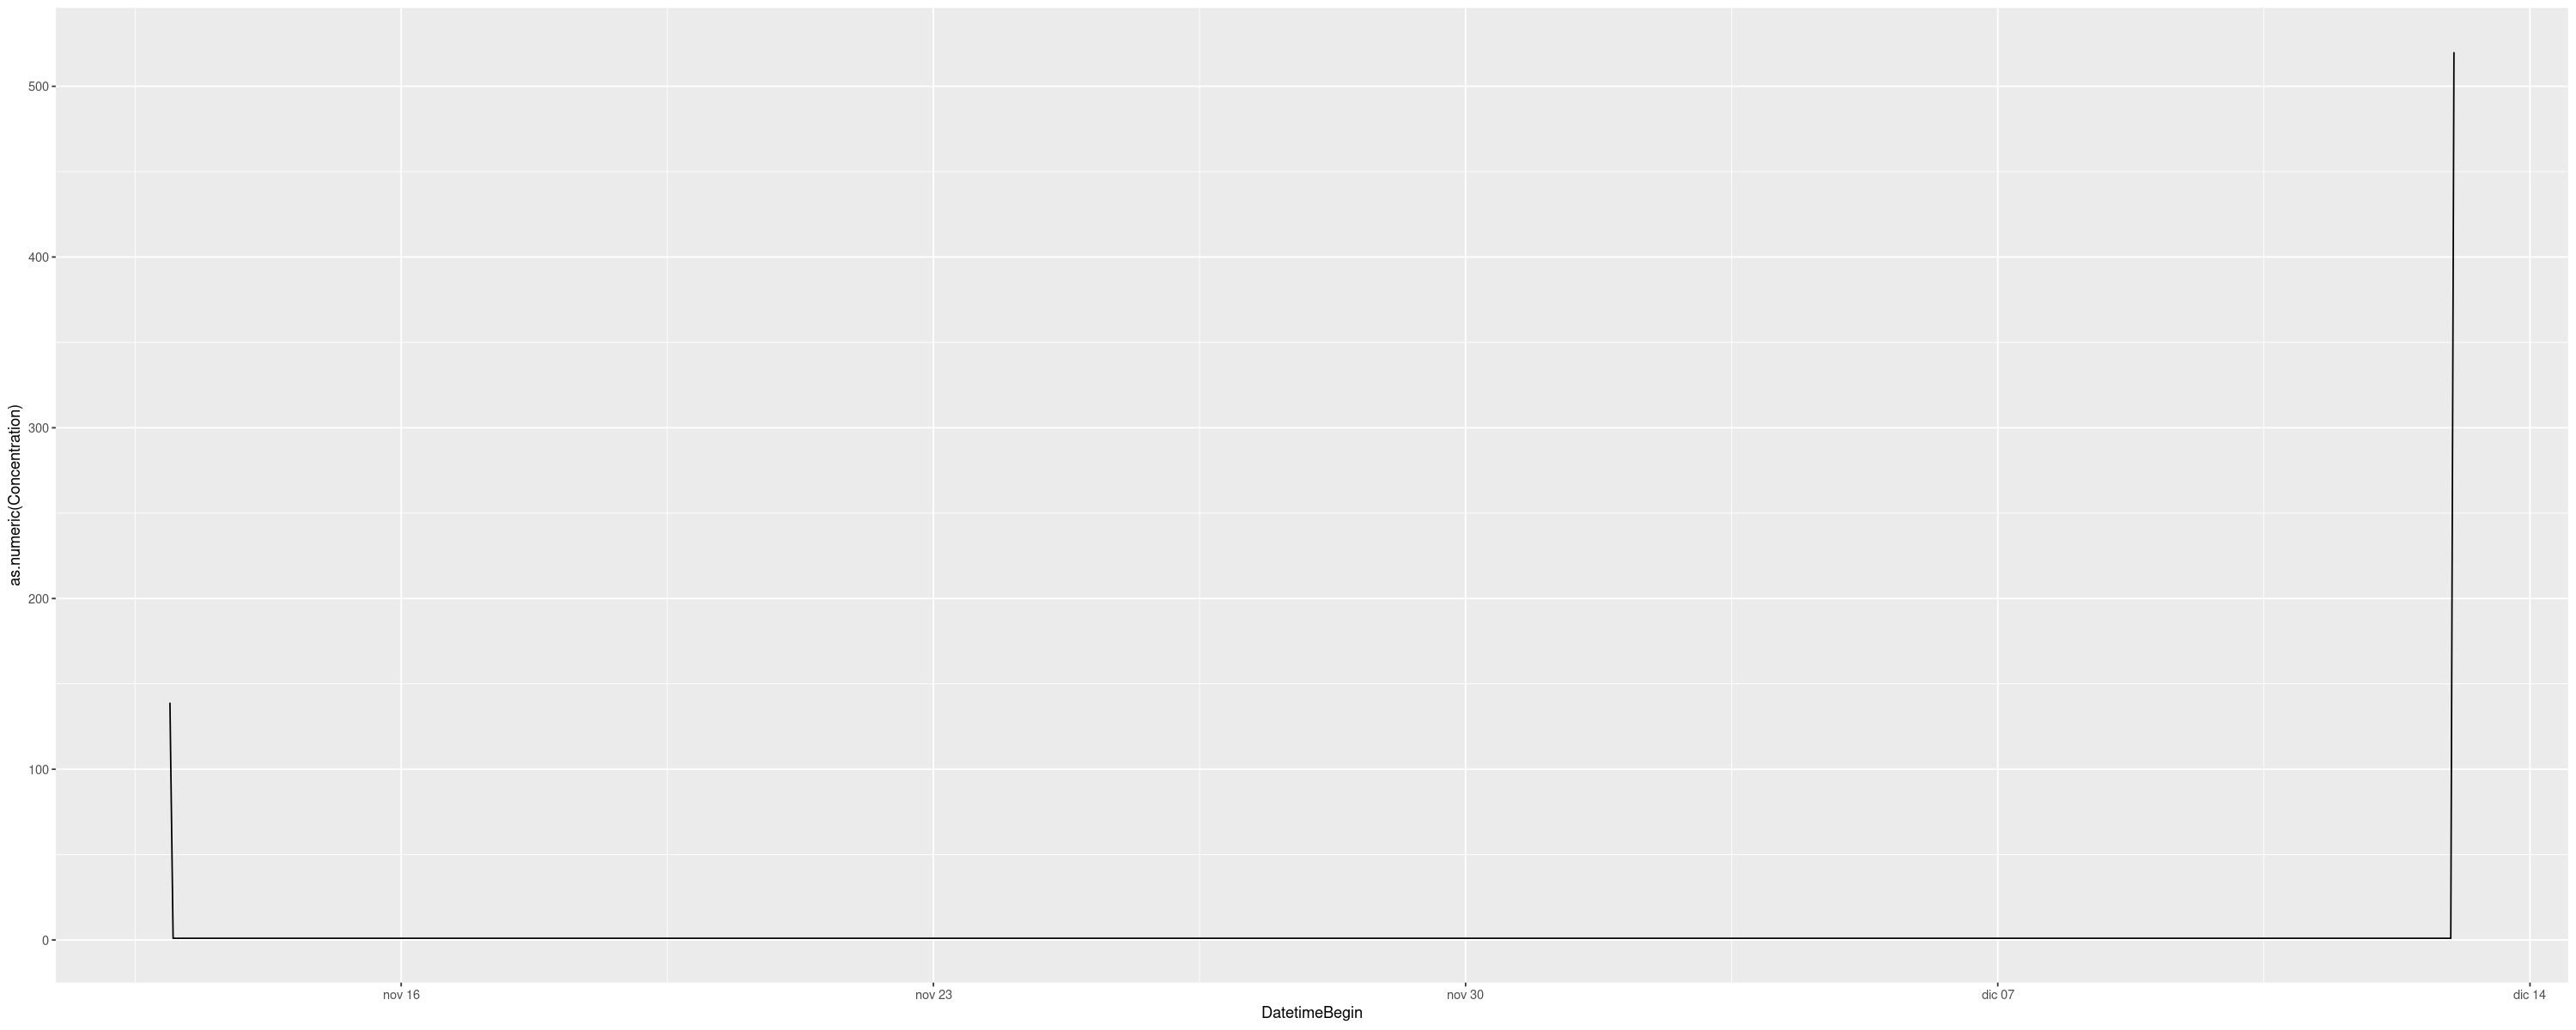

In [57]:
library(ggplot2)
ggplot(data = data[data$DatetimeBegin >= "2020-11-13 00:00:00" & data$DatetimeBegin <= "2020-12-13 01:00:00",]) +
    geom_line(aes(x=DatetimeBegin, y=as.numeric(Concentration)))